In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#mnist dataset is available in scikit learn library

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True)

In [3]:
mnist_df = pd.concat([mnist['target'],mnist['data']], axis=1)

In [4]:
X  = mnist_df.drop('class', axis = 1)
y = mnist_df['class'].astype(float)

In [5]:
y = y[:50000]
X = X[:50000]
y = pd.get_dummies(y)

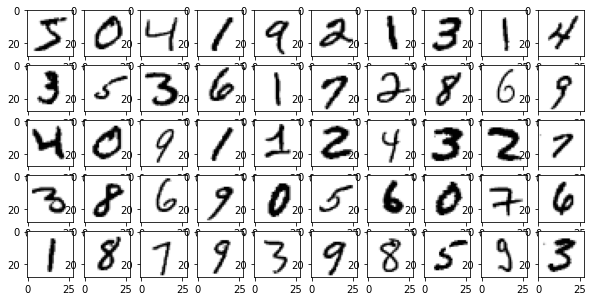

In [6]:
def plot_digit_image(image_data):
    image = np.array(image_data).reshape(28,28)
    plt.imshow(image, cmap = "binary")

fig = plt.figure(figsize = (10,10))


for idx in range(50):
    plt.subplot(10,10, idx+1)
    random_digit = X.iloc[idx]
    plot_digit_image(random_digit)


plt.show()

In [7]:
lsq = np.linalg.pinv(X) @ y

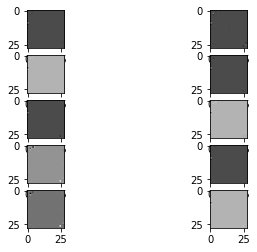

In [8]:
fig.suptitle("Most Informative Pixels")

for idx in range(10):
    plt.subplot(5,2, idx+1)
    random_digit = lsq[idx]
    plot_digit_image(random_digit)

In [9]:
Lasso_reg = linear_model.Lasso(alpha = 1.0, fit_intercept=False).fit(X, y)
Lasso = Lasso_reg.coef_

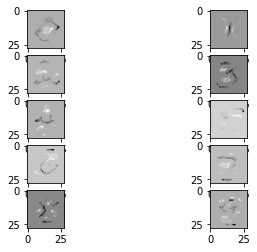

In [10]:
fig.suptitle("Most Informative Pixels by LASSO")
for idx in range(10):
    plt.subplot(5,2, idx+1)
    random_digit = Lasso[idx,:]
    plot_digit_image(random_digit)